In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset from Kaggle with API

# Install Kaggle library
!pip -q install kaggle

# Upload the Kaggle API JSON file
from google.colab import files
files.upload()

# Move the uploaded JSON file to the required directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d sudarshan24byte/online-food-dataset

# Unzip the downloaded dataset
!unzip -q 'online-food-dataset.zip'

Saving kaggle.json to kaggle.json
  0% 0.00/3.37k [00:00<?, ?B/s]
100% 3.37k/3.37k [00:00<00:00, 5.60MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


# EDA

In [ ]:
df.shape

(388, 13)

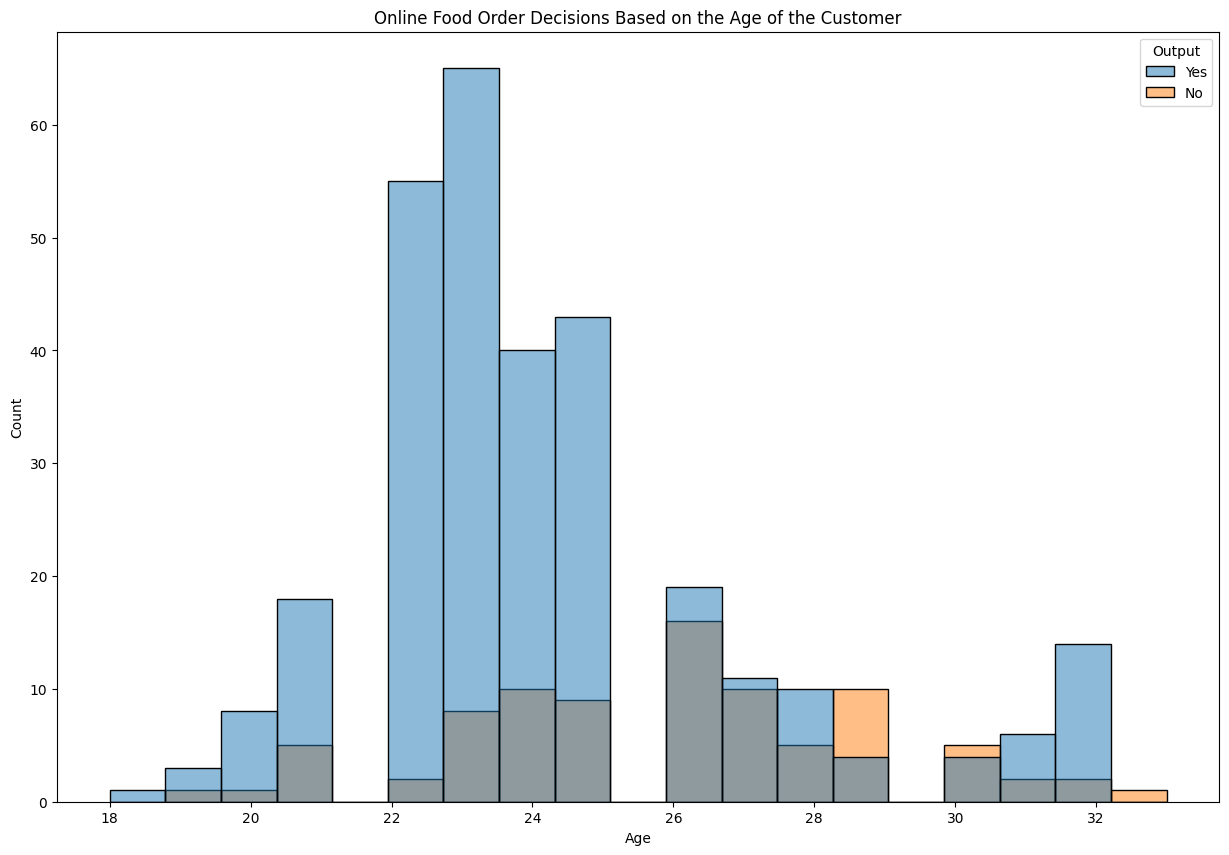

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

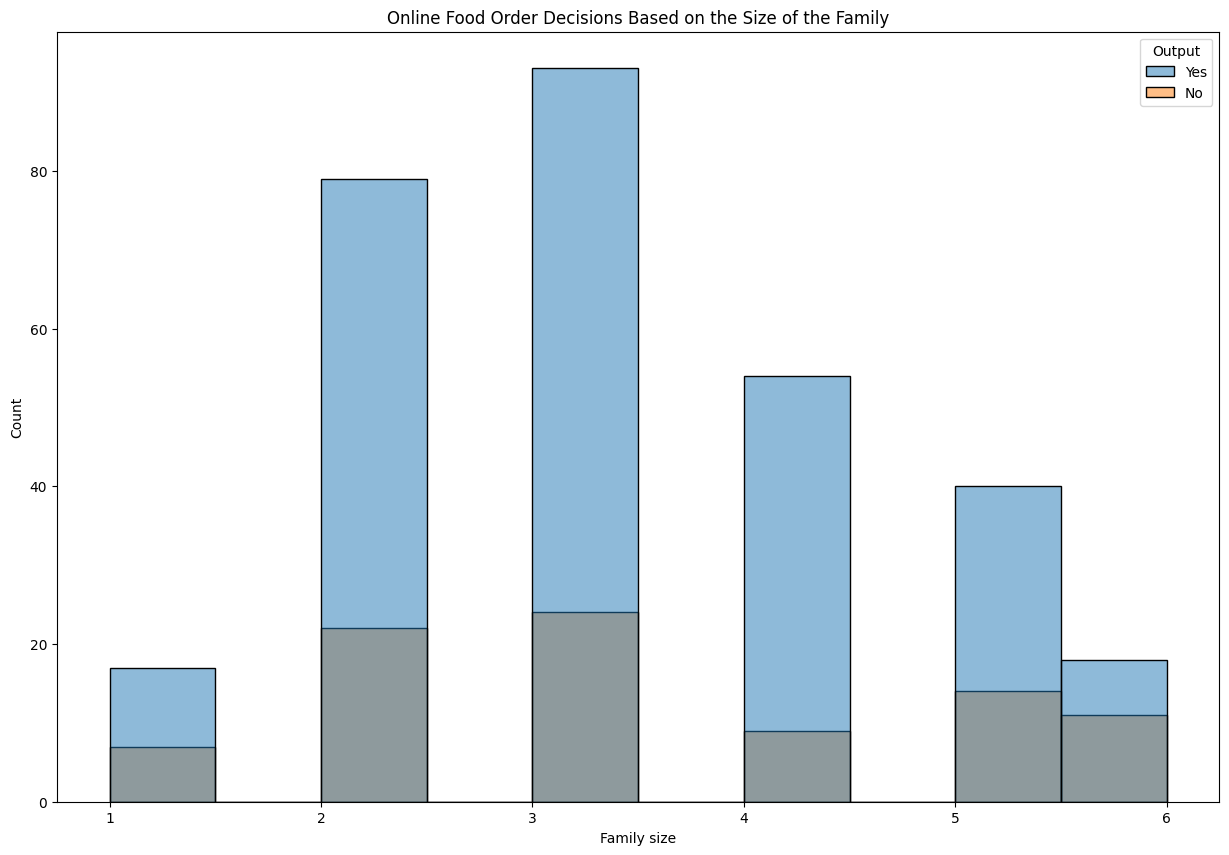

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=df)
plt.show()

In [ ]:
buying_food_again = df.query("Output == 'Yes'")
buying_food_again.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
gender_counts = buying_food_again["Gender"].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts, values='Count', names='Gender', title='Who orders food more: Male or Female')

fig.show()

In [ ]:
martial_status_counts = buying_food_again["Marital Status"].value_counts().reset_index()
martial_status_counts.columns = ['Marital Status', 'Count']

fig = px.pie(martial_status_counts, values='Count', names='Marital Status', title='Who orders food more: Married or Singles')

fig.show()

In [ ]:
monthly_income_counts = buying_food_again["Monthly Income"].value_counts().reset_index()
monthly_income_counts.columns = ['Monthly Income', 'Count']

fig = px.pie(monthly_income_counts, values='Count', names='Monthly Income', title='Analyzing Food Ordering Behavior Across Income Levels')

fig.show()

In [ ]:
family_size_counts = buying_food_again["Family size"].value_counts().reset_index()
family_size_counts.columns = ['Family size', 'Count']

fig = px.pie(family_size_counts, values='Count', names='Family size', title='Food Ordering Patterns Based on Family Size')

fig.show()

In [ ]:
qualification_counts = buying_food_again["Educational Qualifications"].value_counts().reset_index()
qualification_counts.columns = ['Educational Qualifications', 'Count']

fig = px.bar(qualification_counts, x='Educational Qualifications', y='Count', title='Food ordering pattern based on the customers quailification', color='Educational Qualifications')

fig.show()

In [ ]:
feedback_counts = df["Feedback"].value_counts().reset_index()
feedback_counts.columns = ['Feedback', 'Count']

feedback_counts_again = buying_food_again["Feedback"].value_counts().reset_index()
feedback_counts_again.columns = ['Feedback', 'Count']


fig = px.bar(feedback_counts, x='Feedback', y='Count', title='Positive vs Negative Feedback', color='Feedback')
fig_ = px.bar(feedback_counts_again, x='Feedback', y='Count', title='Positive vs Negative Feedback based on the repeat food purchase', color='Feedback')

fig.show()
fig_.show()

# Converting all categorical to numerical values

In [ ]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [ ]:
print('Gender Counts: ', df['Gender'].value_counts())
print('-----------')
print('Marital Status Counts: ', df['Marital Status'].value_counts())
print('-----------')
print('Occupation counts: ', df['Occupation'].value_counts())
print('-----------')
print('Monthly Income counts: ', df['Monthly Income'].value_counts())
print('-----------')
print('Educational Qualifications counts: ', df['Educational Qualifications'].value_counts())
print('-----------')
print('Feedback counts: ', df['Feedback'].value_counts())

Gender Counts:  Male      222
Female    166
Name: Gender, dtype: int64
-----------
Marital Status Counts:  Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64
-----------
Occupation counts:  Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64
-----------
Monthly Income counts:  No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64
-----------
Educational Qualifications counts:  Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64
-----------
Feedback counts:  Positive     317
Negative      71
Name: Feedback, dtype: int64


In [ ]:
df = df.drop(['Unnamed: 12'], axis=1)
df['Gender'] = df["Gender"].map({"Male": 1, "Female": 0})
df['Marital Status'] = df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
df['Occupation'] = df['Occupation'].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 50000, "More than 50000": 70000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})

In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1


# Preparing The Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Output', 'latitude', 'longitude', 'Pin code'], axis=1)
y = df['Output']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9487179487179487

# Let's Test The Model

* Age -> 21
* Gender -> Male [1]
* Marital Status -> Single [1]
* Occupation -> Student [1]
* Monthly Income -> No Income [0]
* Educational Qualification -> Graduate [1]
* Family Size -> 3
* Feedback -> Yes [1]

In [ ]:
model.predict([[21, 1, 1, 1, 0, 1, 3, 1]])

array(['Yes'], dtype=object)

* Age -> 21
* Gender -> Male [1]
* Marital Status -> Single [1]
* Occupation -> Student [1]
* Monthly Income -> No Income [0]
* Educational Qualification -> Graduate [1]
* Family Size -> 1
* Feedback -> No [0]

In [ ]:
model.predict([[21, 1, 1, 1, 0, 1, 1, 0]])

array(['No'], dtype=object)

Source :

https://www.kaggle.com/code/sudarshan24byte/online-food-order-prediction#Converting-all-categorical-to-numerical-values